In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from IPython.display import display
import copy
import seaborn as sns
import scipy
import scipy.io
import pickle
from util import *

In [17]:
def draw_bloxplot(algs, display_alg_name, save_path):
    # load .mat files

    for problem_id in range(1,24,1):
        datas = []
        for alg in algs:
            if alg == 'tabu_irace':
                pkl_file_path = f'../matlab/result/{alg}/instance_4/' + f'f{problem_id}.pkl'
                with open(pkl_file_path, 'rb') as f:
                    # loaded_data: steps(100)*algs(16)*instance(3)*runs(5)
                    data = pickle.load(f)
            else: 
                mat_file_path = f'../matlab/result/{alg}/instance_4/' + f'f{problem_id}.mat'
                mat_data = scipy.io.loadmat(mat_file_path)
                data = -mat_data['res'][0]
            datas.append(data)

        plt.figure(figsize=(5, 3))
        plt.boxplot(datas)
        
        x_axis = np.arange(len(display_alg_name))+1
        plt.xticks(x_axis, display_alg_name)

        plt.title(f'F{problem_id}')
        plt.ylabel('Performance')
        
        if not os.path.exists(save_path):
            os.makedirs(save_path)
        
        plt.savefig(f'{save_path}F{problem_id}.svg',dpi=300,format="svg",bbox_inches = 'tight')

# draw design [1,13,15,20] bloxplot in one pic
def draw_bloxplot_in_one_pic(save_path):

    fig, axs = plt.subplots(2, 2, figsize=(6, 6))

    datas = []
    for problem_id in [1,13,15,20]:
        
        mat_file_path = f'../matlab/result/design/instance_4/' + f'f{problem_id}.mat'
        mat_data = scipy.io.loadmat(mat_file_path)

        data = -mat_data['res'][0]
        datas.append(data)

    axs[0, 0].boxplot(datas[0])
    axs[0, 0].set_title('f1')
    axs[0, 0].get_xaxis().set_visible(False)

    axs[0, 1].boxplot(datas[1])
    axs[0, 1].set_title('f13')
    axs[0, 1].get_xaxis().set_visible(False)

    axs[1, 0].boxplot(datas[2])
    axs[1, 0].set_title('f15')
    axs[1, 0].get_xaxis().set_visible(False)

    axs[1, 1].boxplot(datas[3])
    axs[1, 1].set_title('f20')
    axs[1, 1].get_xaxis().set_visible(False)

    plt.tight_layout()
    #plt.show()

    
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    
    plt.savefig(f'{save_path}bloxplot.svg',dpi=300,format="svg",bbox_inches = 'tight')

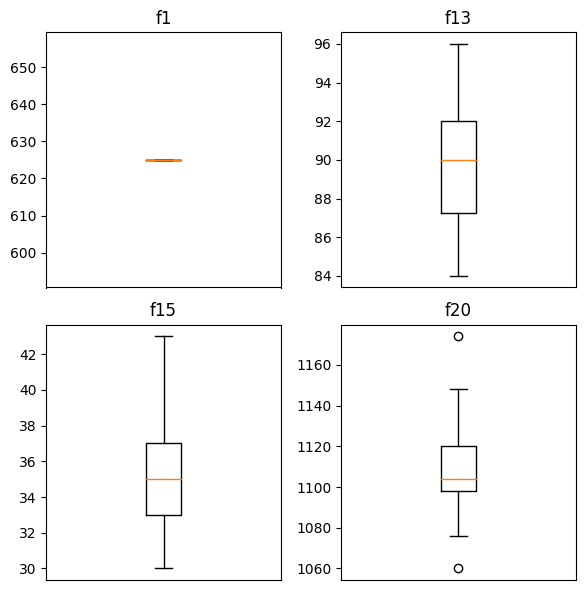

In [18]:
algs = ['design','Discrete_Genetic_Algorithm','Discrete_Iterative_Local_Search','tabu_irace']
display_alg_name = ['Ours', 'GA', 'ILS', 'TS']
save_path = f'result_pictures/bloxplot/'

#draw_bloxplot(algs, display_alg_name, save_path)
draw_bloxplot_in_one_pic(save_path)